In [1]:
import os
import glob
import numpy as np
from random import randint
from matplotlib import pyplot as plt
from PIL import Image,ImageDraw
from shapely.geometry import Polygon
from random import choice
import PIL
import random


## Set all the configurations

In [2]:
## the foreground image is rotated between -20 to +20 degree randomyl
foreground_rotate_lower=-20     
foreground_rotate_upper=20
## upper and lower define the maximum and minimum foregrounds allowed in a foreground
upper=12
lower=1

relaxation=1

background_width=1920
background_height=1080

## Set all the paths required

In [20]:
foregroundPath="/home/saty/Documents/Syn-Create/foregrounds/*"
saveAnnotation="/home/saty/Documents/Syn-Create/NewAnnotations/"
backgroundPath="/home/saty/Documents/Syn-Create/backgrounds/*"
destination="/home/saty/Documents/Syn-Create/syndata/"


## Read and view files

In [4]:
backgrounds= glob.glob(backgroundPath)
#background_engine =glob.glob(background_engine_path)
#print(len(background_scenery), len(background_engine))
#+ background_engine
print(len(backgrounds))
foreground= glob.glob(foregroundPath)
print(len(foreground))

28
78


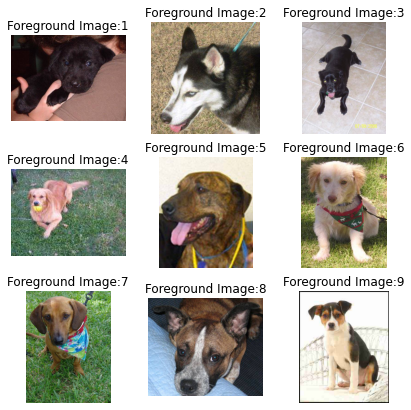

In [7]:
rows = 3
columns = 3
total=rows*columns
fig = plt.figure(figsize=(rows+4, columns+4))
Images=[]
# reading images
for i in range(total):
    Images.append(Image.open(random.sample(foreground,1)[0]))


for i in range(total):
    fig.add_subplot(rows, columns, i+1)
# showing image
    plt.imshow(Images[i])
    plt.axis('off')
    plt.title("Foreground Image:"+str(i+1))


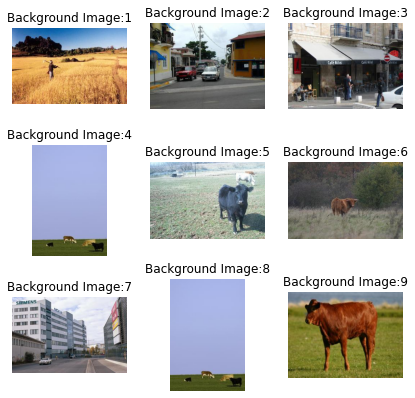

In [8]:
# code for displaying multiple images in one figure

#import libraries
from matplotlib import pyplot as plt

# create figure


# setting values to rows and column variables
rows = 3
columns = 3
total=rows*columns
fig = plt.figure(figsize=(rows+4, columns+4))
Images=[]
# reading images
for i in range(total):
    Images.append(Image.open(random.sample(backgrounds,1)[0]))


for i in range(total):
    fig.add_subplot(rows, columns, i+1)
# showing image
    plt.imshow(Images[i])
    plt.axis('off')
    plt.title("Background Image:"+str(i+1))


## Modules

In [9]:
def get_random_coordinates(img,img_overlay_rgb):
  
    #No_point_range=max(img_overlay_rgb.size[1],img_overlay_rgb.size[0])
    #x_min=No_point_range+1    
    x_min=0
    #x_max=img.size[0] - No_point_range
    x_max=img.size[0]
    #y_min=No_point_range+1
    y_min=0
    y_max=img.size[1]
    #y_max=img.size[1] - No_point_range
    x, y = randint(x_min,x_max), randint(y_min,y_max)
    theta=randint(foreground_rotate_lower,foreground_rotate_upper)
    return (x,y,theta)

In [10]:
def overlay_coordinates(foreground,theta):
    """Overlay `img_overlay` onto `img` at (x, y) and blend using `alpha_mask`.

    `alpha_mask` must have same HxW as `img_overlay` and values in range [0, 1].
    """       
    foreground_rotate=foreground.rotate(theta,expand=1)   
    w_new,h_new= foreground_rotate.size    
    #draw = ImageDraw.Draw(background)
    #draw.rectangle((x,y,x+w_new,y+h_new), fill=None, outline="yellow",width=3)    
    return w_new,h_new
    

In [11]:
def calculate_iou(box_1, box_2): 
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
    if iou>0:
        return 0 
    else:
        return 1
    

In [12]:
def readAndResizeBack(image_path,w_foreground,h_foreground):
    img=Image.open(image_path)
    new_img=img.resize((w_foreground,h_foreground))
    return new_img

In [13]:
def rotate_and_check_for_overlap_and_outside_of_image(x1_of_overlay,y1_of_overlay,theta1_of_overlay,foreground1,x2_of_overlay,y2_of_overlay,theta2_of_overlay,foreground2,filename,background):
    w1_of_overlay,h1_of_overlay= overlay_coordinates(foreground1,theta1_of_overlay)
    w2_of_overlay,h2_of_overlay= overlay_coordinates(foreground2,theta2_of_overlay)
    
    is_inside=check_if_rectangle_in_image(x1_of_overlay,y1_of_overlay,w1_of_overlay,h1_of_overlay,background,filename) #and check_if_rectangle_in_image(x2_of_overlay,y2_of_overlay,w1_of_overlay,h1_of_overlay,background,filename)
    if(is_inside):
        box1=[[x1_of_overlay,y1_of_overlay],[x1_of_overlay+w1_of_overlay,y1_of_overlay],[x1_of_overlay+w1_of_overlay,y1_of_overlay+h1_of_overlay], [x1_of_overlay,y1_of_overlay+h1_of_overlay]]
        box2=[[x2_of_overlay,y2_of_overlay],[x2_of_overlay+w2_of_overlay,y2_of_overlay],[x2_of_overlay+w2_of_overlay,y2_of_overlay+h2_of_overlay], [x2_of_overlay,y2_of_overlay+h2_of_overlay]]
        if not calculate_iou(box1,box2):
           # print("OVERLAP")
            return 0
        else:
            return 1
    else:
     #   print("OUTSIDE OF RECTANGLE")
        return is_inside

In [14]:
###100% inside variant #####

def check_if_rectangle_in_image(x,y,w,h,img,file_name):
    
    if x<0 or x >img.size[0] or x+w<0 or x+w> img.size[0] :
        #print("OUTSIDE",file_name)
        return 0
    if y<0 or y >img.size[1] or y+h<0 or y+h> img.size[1] :
        #print("OUTSIDE",file_name)
        return 0
  
    return 1
        
  
    
    

In [ ]:
#####50% inside variant############ UNDER CONSTRUCTION 
'''
def check_if_rectangle_in_image(x,y,w,h,img,file_name):
    
    if x<0 or x >img.size[0] or x+w<0 or x+w> img.size[0] :
        if (x >img.size[0] or x+w<0):
            return 0
        else:
            total_area=w*h
            
            if(x<0):
                w=w+x
            else:
                w= img.size[0]-x
            
            if not(y>=0 and y+h<=img.size[1]):
                if 
            else:
                w= img.size[0]-x
                
                
            area_inside= w*h
        #print("OUTSIDE",file_name)
        return 0
    if y<0 or y >img.size[1] or y+h<0 or y+h> img.size[1] :
        #print("OUTSIDE",file_name)
        return 0
    
    return 1
'''        
    
    
    

In [16]:
def overlay_image_alpha(foreground1,background, x1, y1,theta1,file_name):
    """Overlay `img_overlay` onto `img` at (x, y) and blend using `alpha_mask`.

    `alpha_mask` must have same HxW as `img_overlay` and values in range [0, 1].
    """
        
    foreground1_rotate=foreground1.rotate(theta1,expand=1)   
    w1_new,h1_new= foreground1_rotate.size    
    #flag2=check_if_rectangle_in_image(x2,y2,w2_new,h2_new,background,file_name)
    #draw = ImageDraw.Draw(background)
    #draw.rectangle((x1,y1,x1+w1_new,y1+h1_new), fill=None, outline="yellow",width=3)   
    background.paste(foreground1_rotate,(x1,y1),foreground1_rotate)
    write_the_annotations(background.size[0],background.size[1],x1,y1,w1_new,h1_new,file_name)
    #    background.paste(foreground2_rotate,(x2,y2),foreground2_rotate)       
    #draw = ImageDraw.Draw(background)
    #draw.rectangle((x2,y2,x2+w2_new,y2+h2_new), fill=None, outline="yellow",width=3)    
   #     write_the_annotations(background.size[0],background.size[1],x2,y2,w2_new,h2_new,file_name)
    # Blend overlay within the determined ranges
    return background,1


In [17]:
def  write_the_annotations(width,height,x,y,w,h,filename):
    file_path=saveAnnotation +filename
    content=[]
    content.extend( list(map(str,[0,float((x+float(w)/2.0)/width),float(float((y+h/2))/height),float(w/width),float(h/height)])))
    writer = open(file_path, 'a+')
    content=" ".join(content) + "\n"
  
    writer.writelines(content)
    writer.close()

In [18]:
def match_f1_f2_maintain_aspect(foreground1,foreground2):
    #print(foreground1.size,foreground2.size)
    area1=foreground1.size[0]*foreground1.size[1]
    area2=foreground2.size[0]*foreground2.size[1]
      
    if(area1>area2):
        r=area1/area2
    else:
        r=area2/area1
   
    
    if r>6:
        aspect1=foreground1.size[0]/foreground1.size[1]
        aspect2=foreground2.size[0]/foreground2.size[1]
        
        if(area1>area2):   #meaning fore2 is to be reshaped 
            if(foreground1.size[0]>foreground1.size[1]):   #change fore2 s width based on fore1 width
                foreground2=foreground2.resize((int(foreground1.size[0]/2),int(foreground1.size[0]/(2 *aspect2))))
            else:
                foreground2=foreground2.resize((int(foreground1.size[1]/(2* aspect2)),int(foreground1.size[1]/2)))
                
        else:
            if(foreground2.size[0]>foreground2.size[1]):   #change fore1 s width based on fore2 width
                foreground1=foreground1.resize((int(foreground2.size[0]/2),int(foreground2.size[0]/(2* aspect1 ))))
            else:
                foreground1=foreground1.resize((int(foreground2.size[1]/(2* aspect1)),int(foreground2.size[1]/2)))
   # print(foreground1.size,foreground2.size)                
    return foreground1,foreground2

## Main Generator Function

In [ ]:
count=0
filess=foreground
print(len(filess))
for bg_path in backgrounds:
    files= random.sample(filess,len(filess))
    ratio_not_include=[]
    no_of_files=len(files)
    while(len(files)>0):
        background=readAndResizeBack(bg_path,background_width,background_height)    
        foreground=[]
        if len(files)>upper:
            no_of_files= random.randrange(1,upper+1) # get random index            
        else:
            no_of_files=len(files)
       # print("no_of_files",no_of_files)
        files_for_current_background=files[-no_of_files:]
        files=files[:-no_of_files]
       # print("CURRENT FILES:",len(files_for_current_background))
        for i in files_for_current_background:
            Img=Image.open(i).convert('RGBA')
            w_,h_,=Img.size
            aspect_=w_/h_
            if(w_>h_):
                w_new=int(background_width/(no_of_files+relaxation))
                h_new=int(w_new/aspect_)

            else:
                h_new=int(background_height/(no_of_files+relaxation))
                w_new=int(h_new*aspect_)
            
            img=Img.resize((w_new,h_new))
            
            foreground.append(img)
     
        ########################## PREPARE FOR OVERLAY ############################################
        data_of_point=[]
        #print(len(foreground))    
        
        for i in range(len(foreground)):
            #print(i)
            overlap_flag=1
            while overlap_flag:
                x_of_overlay,y_of_overlay,theta_of_overlay= get_random_coordinates(background,foreground[i])
                
                if(len(data_of_point)==0):
                    w_of_overlay,h_of_overlay= overlay_coordinates(foreground[i],theta_of_overlay)
                    is_inside=check_if_rectangle_in_image(x_of_overlay,y_of_overlay,w_of_overlay,h_of_overlay,background,str(count)+'.txt') 
                    if(not is_inside):
                        overlap_flag=0               
        
                    
                #print("COORDINATES b4:",x_of_overlay,y_of_overlay,theta_of_overlay)
                #x2_of_overlay,y2_of_overlay,theta2_of_overlay= get_random_coordinates(background,foreground2)
              #  print(i,len(foreground),len(data_of_point),foreground[i].size)
                for j in range(len(data_of_point)):
                   # print("b4",i,j,len(foreground),len(data_of_point),overlap_flag)
                    overlap_flag= rotate_and_check_for_overlap_and_outside_of_image(x_of_overlay,y_of_overlay,theta_of_overlay,foreground[i],data_of_point[j][0],data_of_point[j][1],data_of_point[j][2],foreground[j],str(count)+".txt",background)
                   # print("atr",i,j,len(foreground),len(data_of_point))#overlap_flag,x_of_overlay,y_of_overlay,theta_of_overlay)
                    if (overlap_flag==0):
                        break
                if(overlap_flag==1):
                    data_of_point.append((x_of_overlay,y_of_overlay,theta_of_overlay))
                    overlap_flag=0
                else:
                    overlap_flag=1
                    
           # if (len(data_of_point)==len(foreground)):
            #    break
            
        #x_of_overlay,y_of_overlay,theta_of_overlay= 0,0, 15
        print(count)
        
        img_result=background
        for i in range(len(data_of_point)):
            background,success=overlay_image_alpha(foreground[i],background,data_of_point[i][0],data_of_point[i][1],data_of_point[i][2],str(count)+".txt")
        background.save(destination+str(count)+".jpg")
        #plt.imshow(img_result)
        #plt.show()
        count+=1

    ########################## FIND COUNTOURS OF FOREG"ROUND AFTER OVERLAY AND SAVE ################

        


## View Results

In [21]:
synimages= glob.glob(destination+'/*')
#background_engine =glob.glob(background_engine_path)
#print(len(background_scenery), len(background_engine))
#+ background_engine
print(len(synimages))

163


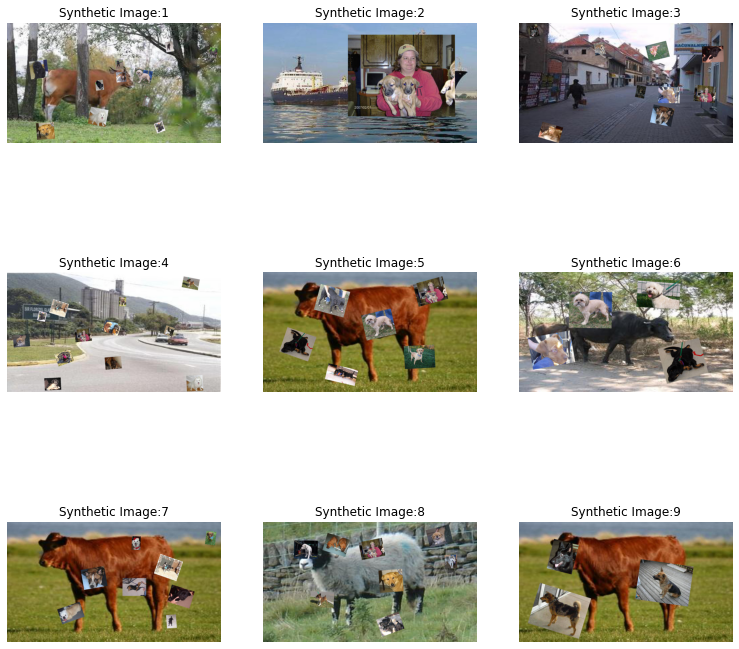

In [24]:
rows = 3
columns = 3
total=rows*columns
fig = plt.figure(figsize=(rows+10, columns+10))
Images=[]
# reading images
for i in range(total):
    Images.append(Image.open(random.sample(synimages,1)[0]))


for i in range(total):
    fig.add_subplot(rows, columns, i+1)
# showing image
    plt.imshow(Images[i])
    plt.axis('off')
    plt.title("Synthetic Image:"+str(i+1))
